In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from imblearn.under_sampling import RandomUnderSampler
import scikitplot as skplt
import sys
import warnings

In [2]:
df1=pd.read_csv('365_course_ratings.csv')
df2=pd.read_csv('365_student_quizzes.csv')
df3=pd.read_csv('365_quiz_info.csv')
df4=pd.read_csv('365_exam_info.csv')
df5=pd.read_csv('365_course_info.csv')
df6=pd.read_csv('365_student_purchases.csv')
df7=pd.read_csv('365_student_learning.csv')
df8=pd.read_csv('365_student_info.csv')
df9=pd.read_csv('365_student_hub_questions.csv')
df10=pd.read_csv('365_student_engagement.csv')
df11=pd.read_csv('365_student_exams.csv')

In [3]:
df1.sample(1)

,course_id,student_id,course_rating,date_rated
2311,21,292815,5,2022-10-15


In [4]:
df2.sample(1)

,student_id,quiz_id,question_id,answer_id
141643,294273,45,822,3249.0


In [5]:
df3.sample(1)

,quiz_id,question_id,answer_id,answer_correct
2592,442,666,2593,n


In [6]:
df4.sample(1)

,exam_id,exam_category,exam_duration
143,821,2,8


In [7]:
df5.sample(1)

,course_id,course_title
37,49,Linear Algebra and Feature Selection


In [8]:
df6.sample(1)

,purchase_id,student_id,purchase_type,date_purchased
843,18265,269633,Monthly,2022-04-04


In [9]:
df7.sample(1)

,student_id,course_id,minutes_watched,date_watched
918,259171,23,16.1,2022-02-04


In [10]:
df8.sample(1)

,student_id,student_country,date_registered
9615,268679,EG,2022-03-27


In [11]:
df9.sample(1)

,hub_question_id,student_id,date_question_asked
71,8222,261121,2022-03-04


In [12]:
df10.sample(1)

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
29824,670897,276261,0,0,1,2022-06-17


In [13]:
df11.sample(1)

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed
2274,182229,260477,521,67,25.0,2022-02-06


# Feature engineering & Pre-Processing

In [14]:
df1['counter']=1
engfr=[]
for x in df8['student_id']:
    engfr.append(df1.loc[df1['student_id'] == x, 'counter'].sum())
df8["courses_rated"] = engfr

In [15]:
df8.sample(10)

,student_id,student_country,date_registered,courses_rated
10771,269883,CA,2022-04-06,0
24137,283752,PK,2022-08-03,0
33373,293566,US,2022-10-06,0
18565,278006,EG,2022-06-16,0
826,259642,US,2022-01-07,0
34028,294261,CA,2022-10-11,0
22508,282056,CN,2022-07-19,0
17769,277163,EG,2022-06-09,0
28314,287997,IN,2022-08-25,0
18757,278201,UG,2022-06-17,0


In [16]:
df7=df7.drop_duplicates(
  subset = ['student_id', 'course_id'],
  keep = 'last').reset_index(drop = True)

In [17]:
df7['counter']=1
courses_watched_by_student=[]
for x in df8['student_id']:
    courses_watched_by_student.append(df7.loc[df7['student_id'] == x, 'counter'].sum())
df8["courses_watched"] = courses_watched_by_student

In [18]:
df8.sample(10)

,student_id,student_country,date_registered,courses_rated,courses_watched
23112,282695,MX,2022-07-26,0,1
5267,264205,IN,2022-02-19,0,0
13312,272533,US,2022-05-01,0,1
33017,293195,PH,2022-10-04,0,1
16458,275814,IN,2022-06-02,0,0
15598,274901,BD,2022-05-24,1,3
3212,262092,GB,2022-01-31,0,1
15454,274751,US,2022-05-22,0,1
20722,280212,NG,2022-07-03,0,1
7072,266042,IN,2022-03-06,0,1


In [19]:
df10['counter']=1
engfr=[]
for x in df8['student_id']:
    engfr.append(df10.loc[df10['student_id'] == x, 'counter'].sum())
df8["number_of_engagments"] = engfr

cor=[]
for x in df8['student_id']:
    cor.append(df10.loc[df10['student_id'] == x, 'engagement_lessons'].sum())
df8["engagments_lessons"] = cor

ex=[]
for x in df8['student_id']:
    ex.append(df10.loc[df10['student_id'] == x, 'engagement_exams'].sum())
df8["engagement_exams"] = ex

qu=[]
for x in df8['student_id']:
    qu.append(df10.loc[df10['student_id'] == x, 'engagement_quizzes'].sum())
df8["engagement_quizzes"] = qu

In [20]:
df8

,student_id,student_country,date_registered,courses_rated,courses_watched,number_of_engagments,engagments_lessons,engagement_exams,engagement_quizzes
0,258798,IN,2022-01-01,0,1,1,1,0,0
1,258799,CO,2022-01-01,0,0,0,0,0,0
2,258800,CA,2022-01-01,0,9,29,29,5,10
3,258801,IN,2022-01-01,0,0,0,0,0,0
4,258802,US,2022-01-01,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
35225,295511,CM,2022-10-20,0,1,1,1,0,1
35226,295512,CA,2022-10-20,0,1,1,1,0,1
35227,295513,SA,2022-10-20,0,1,1,1,0,0
35228,295514,NL,2022-10-20,0,0,0,0,0,0


In [21]:
paid_students_id=[]
for x in df6['student_id']:
    paid_students_id.append(x)
    
def paid_free(x):
    if x in paid_students_id:
        return 1
    else:
        return 0
    
df8['Paid']=df8['student_id'].map(paid_free)

In [22]:
average_course_rating=[]
for x in df8['student_id']:
    average_course_rating.append(df1.loc[df1['student_id'] == x, 'course_rating'].mean())
df8['average_course_rating'] = average_course_rating

minutes_watched_by_student=[]
for x in df8['student_id']:
    minutes_watched_by_student.append(df7.loc[df7['student_id'] == x, 'minutes_watched'].sum())
df8['minutes_watched_by_student']=minutes_watched_by_student

In [23]:
df8

,student_id,student_country,date_registered,courses_rated,courses_watched,number_of_engagments,engagments_lessons,engagement_exams,engagement_quizzes,Paid,average_course_rating,minutes_watched_by_student
0,258798,IN,2022-01-01,0,1,1,1,0,0,0,NaN,0.3
1,258799,CO,2022-01-01,0,0,0,0,0,0,0,NaN,0.0
2,258800,CA,2022-01-01,0,9,29,29,5,10,1,NaN,74.3
3,258801,IN,2022-01-01,0,0,0,0,0,0,0,NaN,0.0
4,258802,US,2022-01-01,0,0,0,0,0,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35225,295511,CM,2022-10-20,0,1,1,1,0,1,0,NaN,7.8
35226,295512,CA,2022-10-20,0,1,1,1,0,1,0,NaN,10.4
35227,295513,SA,2022-10-20,0,1,1,1,0,0,0,NaN,0.1
35228,295514,NL,2022-10-20,0,0,0,0,0,0,0,NaN,0.0


# Finding Correlation

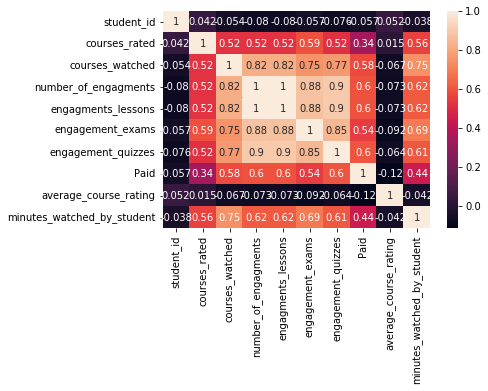

In [24]:
corr_matrix = df8.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [25]:
df8=df8.drop(['student_country','date_registered','average_course_rating'], axis=1)

# Splitting the dataset & Buliding the model

In [26]:
x=df8.drop(['student_id','Paid'],axis=1)
y=df8['Paid']
x

,courses_rated,courses_watched,number_of_engagments,engagments_lessons,engagement_exams,engagement_quizzes,minutes_watched_by_student
0,0,1,1,1,0,0,0.3
1,0,0,0,0,0,0,0.0
2,0,9,29,29,5,10,74.3
3,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...
35225,0,1,1,1,0,1,7.8
35226,0,1,1,1,0,1,10.4
35227,0,1,1,1,0,0,0.1
35228,0,0,0,0,0,0,0.0


In [27]:
x.isnull().sum()

courses_rated                 0
courses_watched               0
number_of_engagments          0
engagments_lessons            0
engagement_exams              0
engagement_quizzes            0
minutes_watched_by_student    0
dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [29]:
y_train.value_counts()

0    24792
1     1630
Name: Paid, dtype: int64

## Trying two methods to fix imbalanced classes , Starting by oversampling SMOTE , it works the following way :

### Identify the minority class vector.
### Deciding the number of nearest k-nearest neighbour 
### generating line between the minority data points and any of its neighbors and place a synthetic point



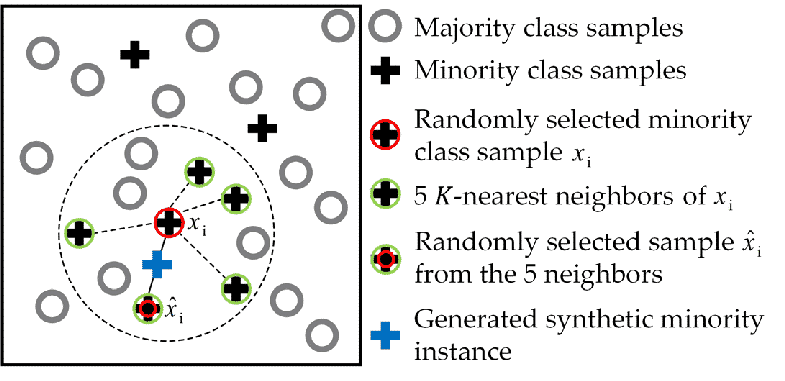

In [30]:
sampler=SMOTE()
x_train_over_sampled,y_train_over_sampled=sampler.fit_resample(x_train,y_train)
y_train_over_sampled.value_counts()

1    24792
0    24792
Name: Paid, dtype: int64

## Scaling data

In [31]:
scaler1=StandardScaler()
scaler1.fit(x_train_over_sampled)
x_train_over_sampled=scaler1.transform(x_train_over_sampled)
x_test=scaler1.transform(x_test)
x_train_over_sampled

array([[-0.28526022, -0.39529158, -0.48387016, ..., -0.45785948,
        -0.55562113, -0.41365428],
       [-0.28526022, -0.39529158, -0.48387016, ..., -0.45785948,
        -0.55562113, -0.4241871 ],
       [-0.28526022, -0.39529158, -0.48387016, ..., -0.45785948,
        -0.55562113, -0.42468867],
       ...,
       [-0.28526022, -0.04727159,  0.26409077, ...,  0.30324163,
         0.12563724, -0.0620146 ],
       [ 0.73783872,  0.3007484 , -0.1098897 , ..., -0.2675842 ,
        -0.04467735,  0.00666643],
       [-0.28526022, -0.39529158, -0.42154009, ..., -0.45785948,
        -0.21499194, -0.2909408 ]])

In [32]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

In [33]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train_over_sampled,y_train_over_sampled)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)
    

using LR: 
Training Accuracy :0.06169101506320491
Testing Accuracy :0.9386920980926431
Confusion matrix:
 [[7852  451]
 [  89  416]]
Recall: 0.8237623762376237
precision: 0.4798154555940023
F1-score: 0.6064139941690961
Fbeta-score: 0.5235338535112006
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8303
           1       0.48      0.82      0.61       505

    accuracy                           0.94      8808
   macro avg       0.73      0.88      0.79      8808
weighted avg       0.96      0.94      0.95      8808

---------------------------------
using KNN: 


C:\Users\101\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\101\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Training Accuracy :0.06169101506320491
Testing Accuracy :0.926544050862852
Confusion matrix:
 [[7754  549]
 [  98  407]]
Recall: 0.805940594059406
precision: 0.42573221757322177
F1-score: 0.5571526351813826
Fbeta-score: 0.4700854700854701
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8303
           1       0.43      0.81      0.56       505

    accuracy                           0.93      8808
   macro avg       0.71      0.87      0.76      8808
weighted avg       0.96      0.93      0.94      8808

---------------------------------
using DT: 
Training Accuracy :0.07788963742335932
Testing Accuracy :0.9386920980926431
Confusion matrix:
 [[7920  383]
 [ 157  348]]
Recall: 0.689108910891089
precision: 0.47606019151846785
F1-score: 0.5631067961165048
Fbeta-score: 0.5074365704286965
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      8303
           1       0.48      0.69      0

C:\Users\101\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\101\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Training Accuracy :0.06169101506320491
Testing Accuracy :0.931653042688465
Confusion matrix:
 [[7786  517]
 [  85  420]]
Recall: 0.8316831683168316
precision: 0.44823906083244397
F1-score: 0.5825242718446603
Fbeta-score: 0.4937691041617681
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8303
           1       0.45      0.83      0.58       505

    accuracy                           0.93      8808
   macro avg       0.72      0.88      0.77      8808
weighted avg       0.96      0.93      0.94      8808

---------------------------------
using NB: 
Training Accuracy :0.06169101506320491
Testing Accuracy :0.9604904632152589
Confusion matrix:
 [[8082  221]
 [ 127  378]]
Recall: 0.7485148514851485
precision: 0.6310517529215359
F1-score: 0.6847826086956523
Fbeta-score: 0.6514994829369184
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8303
           1       0.63      0.75      

C:\Users\101\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\101\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy :0.06169101506320491
Testing Accuracy :0.9363079019073569
Confusion matrix:
 [[7864  439]
 [ 122  383]]
Recall: 0.7584158415841584
precision: 0.4659367396593674
F1-score: 0.5772418990203466
Fbeta-score: 0.5048774057474296
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      8303
           1       0.47      0.76      0.58       505

    accuracy                           0.94      8808
   macro avg       0.73      0.85      0.77      8808
weighted avg       0.95      0.94      0.94      8808

---------------------------------
using RF: 
Training Accuracy :0.06169101506320491
Testing Accuracy :0.9407356948228883
Confusion matrix:
 [[7906  397]
 [ 125  380]]
Recall: 0.7524752475247525
precision: 0.48906048906048905
F1-score: 0.592823712948518
Fbeta-score: 0.5258787711043454
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      8303
           1       0.49      0.75      

C:\Users\101\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## Cross-Validation

In [34]:
model=DecisionTreeClassifier(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([0.0490458 , 0.05104733, 0.0600543 , 0.05404878, 0.05504537,
        0.05004692, 0.0460391 , 0.05004811, 0.05004597, 0.06205177]),
 'score_time': array([0.00301027, 0.00500417, 0.004004  , 0.00400448, 0.00800991,
        0.00400186, 0.00400901, 0.00499916, 0.00300264, 0.00300384]),
 'test_score': array([0.96792506, 0.96423503, 0.96423503, 0.96253193, 0.95912575,
        0.9577065 , 0.95628726, 0.94578484, 0.9577065 , 0.95202952]),
 'train_score': array([0.99189453, 0.99230454, 0.99224146, 0.99230454, 0.99271454,
        0.99255685, 0.99233608, 0.99252531, 0.99239915, 0.99255685])}

In [35]:
CV_result['test_score'].mean()

0.958756741413568

In [36]:
model=SVC(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([7.66695714, 7.7089963 , 7.61291146, 7.60890651, 7.63192749,
        7.55085588, 7.66195345, 7.58388257, 7.79106832, 7.33165312]),
 'score_time': array([1.11601353, 1.1410358 , 1.16705775, 1.14904165, 1.07797885,
        1.01091576, 1.14604163, 1.11601186, 1.16405678, 1.07798004]),
 'test_score': array([0.97331819, 0.97672438, 0.97133125, 0.97246665, 0.96622197,
        0.96338348, 0.96423503, 0.95401646, 0.96565427, 0.95515186]),
 'train_score': array([0.96751506, 0.96685275, 0.96732583, 0.96745198, 0.96836661,
        0.96808276, 0.96798814, 0.9679566 , 0.96760968, 0.96896584])}

In [37]:
CV_result['test_score'].mean()

0.9662503548112404

In [38]:
model=RandomForestClassifier(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([1.52938366, 1.54039574, 1.5093658 , 1.48734641, 1.51136756,
        1.51537156, 1.50936389, 1.48734641, 1.50536895, 1.45832539]),
 'score_time': array([0.05605698, 0.05604982, 0.04904413, 0.04604149, 0.05304861,
        0.04704213, 0.05304933, 0.04804349, 0.05504656, 0.05405188]),
 'test_score': array([0.97019586, 0.96849276, 0.9710474 , 0.96877661, 0.96508657,
        0.96338348, 0.96054499, 0.95628726, 0.97019586, 0.96139654]),
 'train_score': array([0.991863  , 0.99224146, 0.99220992, 0.992273  , 0.992683  ,
        0.99255685, 0.99233608, 0.99249377, 0.99239915, 0.99255685])}

In [39]:
CV_result['test_score'].mean()

0.9655407323304003

In [40]:
model1=GaussianNB()
model1.fit(x_train_over_sampled,y_train_over_sampled)
y_pred=model1.predict(x_test)

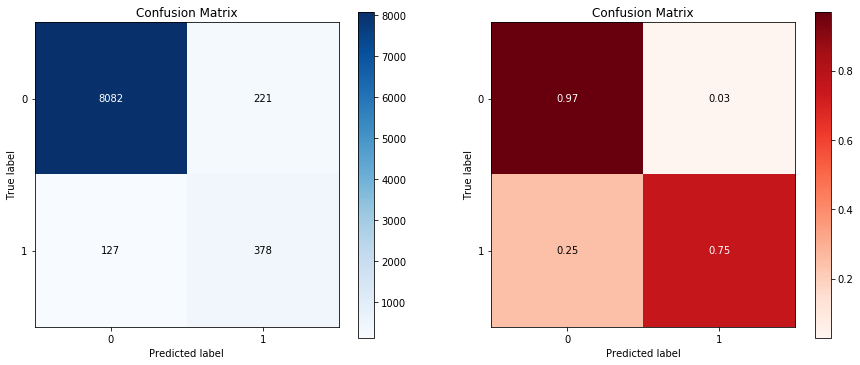

In [41]:
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Reds",
                                    ax=ax2);

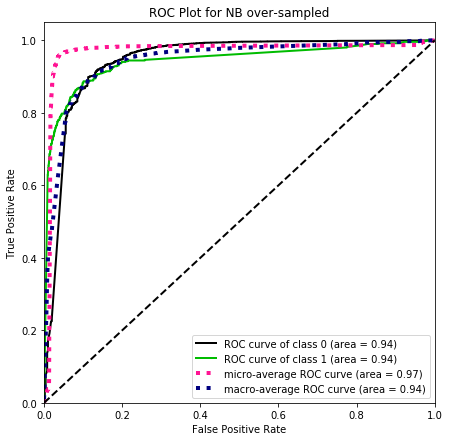

In [42]:
y_gbc_proba = model1.predict_proba(x_test)
fig, ax = plt.subplots(figsize=(7, 7))
skplt.metrics.plot_roc(y_test, y_gbc_proba, title = 'ROC Plot for NB over-sampled',ax=ax)

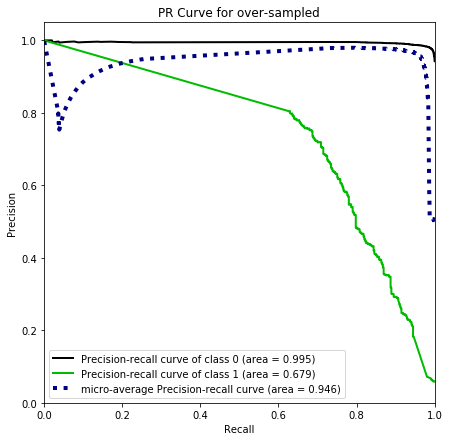

In [43]:
fig, ax = plt.subplots(figsize=(7, 7))
skplt.metrics.plot_precision_recall(y_test, y_gbc_proba, title = 'PR Curve for over-sampled',ax=ax)

# Trying Under-sampling to fix imbalanced classes

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [45]:
rus=RandomUnderSampler()
x_train_under_sampled, y_train_under_sampled=rus.fit_resample(x_train,y_train)

In [46]:
y_train_under_sampled.value_counts()

1    1584
0    1584
Name: Paid, dtype: int64

In [47]:
scaler2=StandardScaler()
scaler2.fit(x_train_under_sampled)
x_train_under_sampled=scaler2.transform(x_train_under_sampled)
x_test=scaler2.transform(x_test)
x_train_over_sampled

array([[-0.28526022, -0.39529158, -0.48387016, ..., -0.45785948,
        -0.55562113, -0.41365428],
       [-0.28526022, -0.39529158, -0.48387016, ..., -0.45785948,
        -0.55562113, -0.4241871 ],
       [-0.28526022, -0.39529158, -0.48387016, ..., -0.45785948,
        -0.55562113, -0.42468867],
       ...,
       [-0.28526022, -0.04727159,  0.26409077, ...,  0.30324163,
         0.12563724, -0.0620146 ],
       [ 0.73783872,  0.3007484 , -0.1098897 , ..., -0.2675842 ,
        -0.04467735,  0.00666643],
       [-0.28526022, -0.39529158, -0.42154009, ..., -0.45785948,
        -0.21499194, -0.2909408 ]])

In [48]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train_under_sampled,y_train_under_sampled)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)
    

using LR: 
Training Accuracy :0.05995004163197336
Testing Accuracy :0.9369891008174387
Confusion matrix:
 [[7801  456]
 [  99  452]]
Recall: 0.8203266787658802
precision: 0.4977973568281938
F1-score: 0.6196024674434544
Fbeta-score: 0.5402820941907721
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      8257
           1       0.50      0.82      0.62       551

    accuracy                           0.94      8808
   macro avg       0.74      0.88      0.79      8808
weighted avg       0.96      0.94      0.94      8808

---------------------------------
using KNN: 
Training Accuracy :0.05995004163197336
Testing Accuracy :0.9076975476839237
Confusion matrix:
 [[7525  732]
 [  81  470]]
Recall: 0.852994555353902
precision: 0.3910149750415973
F1-score: 0.5362236166571592
Fbeta-score: 0.4385146482552715
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      8257
           1       0.39     

In [49]:
model=DecisionTreeClassifier(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([0.04103565, 0.04303932, 0.04003477, 0.03903389, 0.04103565,
        0.03903008, 0.04403687, 0.0400331 , 0.04203677, 0.04103756]),
 'score_time': array([0.00300527, 0.00300193, 0.00300455, 0.00200176, 0.00300527,
        0.00200176, 0.00300288, 0.00300407, 0.0030055 , 0.00400281]),
 'test_score': array([0.96792506, 0.96423503, 0.96423503, 0.96253193, 0.95912575,
        0.9577065 , 0.95628726, 0.94578484, 0.9577065 , 0.95202952]),
 'train_score': array([0.99189453, 0.99230454, 0.99224146, 0.99230454, 0.99271454,
        0.99255685, 0.99233608, 0.99252531, 0.99239915, 0.99255685])}

In [50]:
CV_result['test_score'].mean()

0.958756741413568

In [51]:
model=SVC(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([7.47878742, 7.5108161 , 7.45476317, 7.37469029, 7.48279023,
        7.25758505, 7.39470768, 7.32864809, 7.51181412, 7.10744691]),
 'score_time': array([1.13603044, 1.15604949, 1.21209931, 1.22210717, 1.15504861,
        1.12301874, 1.21710277, 1.16505718, 1.13603044, 1.18607044]),
 'test_score': array([0.97331819, 0.97672438, 0.97133125, 0.97246665, 0.96622197,
        0.96338348, 0.96423503, 0.95401646, 0.96565427, 0.95515186]),
 'train_score': array([0.96751506, 0.96685275, 0.96732583, 0.96745198, 0.96836661,
        0.96808276, 0.96798814, 0.9679566 , 0.96760968, 0.96896584])}

In [52]:
CV_result['test_score'].mean()

0.9662503548112404

In [53]:
model=RandomForestClassifier(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([1.53138232, 1.52437615, 1.49134564, 1.4983511 , 1.5103662 ,
        1.52137351, 1.47833276, 1.45931554, 1.52237344, 1.47833514]),
 'score_time': array([0.05204582, 0.04403806, 0.0520494 , 0.04604387, 0.04603863,
        0.04704189, 0.04804492, 0.04504204, 0.05404782, 0.05204725]),
 'test_score': array([0.97019586, 0.96849276, 0.9710474 , 0.96877661, 0.96508657,
        0.96338348, 0.96054499, 0.95628726, 0.97019586, 0.96139654]),
 'train_score': array([0.991863  , 0.99224146, 0.99220992, 0.992273  , 0.992683  ,
        0.99255685, 0.99233608, 0.99249377, 0.99239915, 0.99255685])}

In [54]:
CV_result['test_score'].mean()

0.9655407323304003

In [55]:
model2=GaussianNB()
model2.fit(x_train_under_sampled,y_train_under_sampled)
y_pred=model2.predict(x_test)

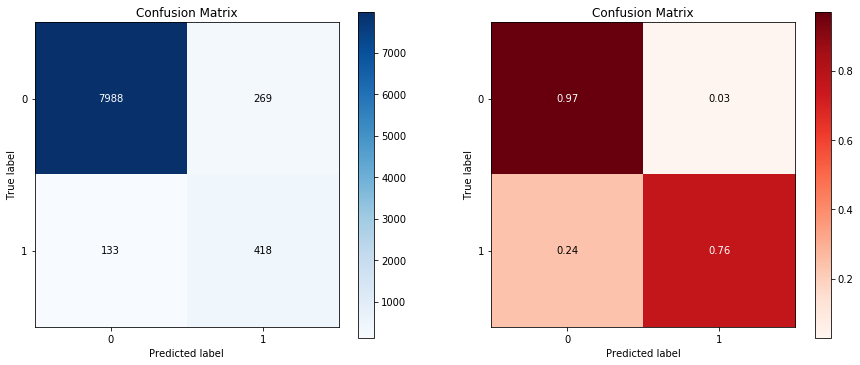

In [56]:
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Reds",
                                    ax=ax2);

In [57]:
y_gbc_proba = model2.predict_proba(x_test)

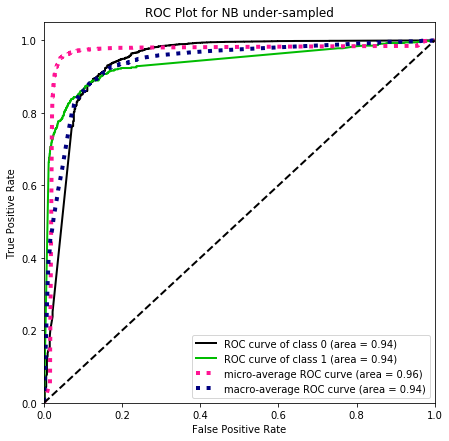

In [58]:
fig, ax = plt.subplots(figsize=(7, 7))
skplt.metrics.plot_roc(y_test, y_gbc_proba, title = 'ROC Plot for NB under-sampled',ax=ax)

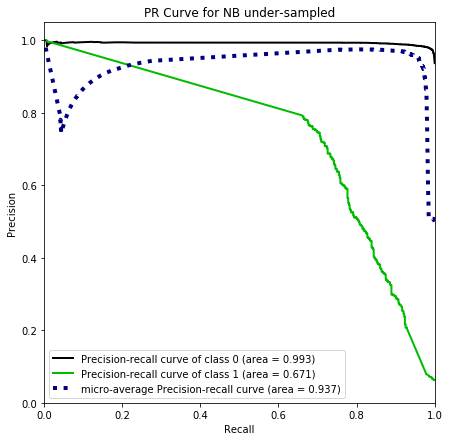

In [59]:
fig, ax = plt.subplots(figsize=(7, 7))
skplt.metrics.plot_precision_recall(y_test, y_gbc_proba, title = 'PR Curve for NB under-sampled',ax=ax)

## As we saw , over-sampling data gave us better overall result's , I choosed naive_bayes as  our model as it gave us the best accuracy & F1-score 

## Saving the model for deployment

In [ ]:
import joblib
joblib.dump(model1,'model.h5')
joblib.dump(scaler1,'scaler.h5')